In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # we only take the first two features.
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# stratify=y ensures that the class distribution is preserved in both training and test sets

### 標準化

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # fit only on the training data
X_train_std = scaler.transform(X_train)  # transform training data
X_test_std = scaler.transform(X_test)  # transform test data using the same scaler

In [4]:
x_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

### モデル

In [5]:
import numpy as np

class LogisticRegressionGD:
    """勾配降下法に基づくロジスティック回帰分類器"""

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        """学習率の初期化、訓練回数の初期化、乱数シードを固定するrandom_state"""
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """訓練データに適合させる

        パラメータ
        ----------
        X : 配列のような構造, shape = [n_examples, n_features]
            訓練データ
        y : 配列のような構造, shape = [n_examples]
            目的変数
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        self.losses_ = []

        # 訓練回数分まで訓練データを反復処理
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output

            # 重みとバイアスの更新
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()

            # ロジスティック回帰の損失（交差エントロピー誤差）
            loss = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))) / X.shape[0]
            self.losses_.append(loss)

        return self

    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """ロジスティックシグモイド活性化関数を計算"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    # グリッドポイントの等高線をプロット
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)

    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラスごとに訓練データをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=f'Class{cl}',
                    edgecolor='black')
        
    # テストデータ点を目立たせる（点を○で表示）
    if test_idx:
        # すべてのテストデータ点をプロット
        X_test, y_test = X[test_idx], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', alpha=1.0, linewidths=1, marker='o', s=100, label='Test set', edgecolor='black')


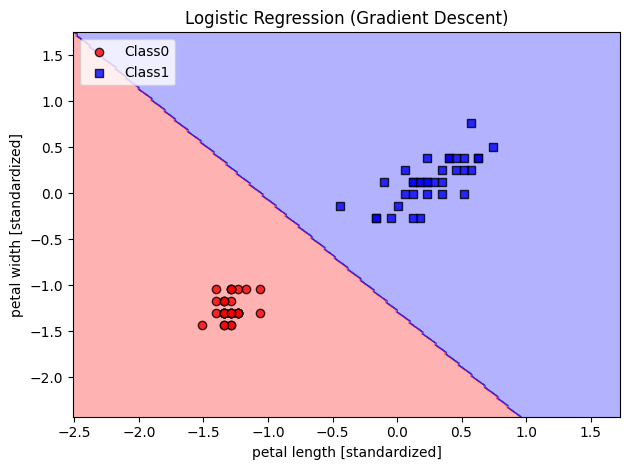

In [7]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

# ロジスティック回帰モデルのインスタンス化と訓練
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
# 訓練データの決定境界をプロット
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.title('Logistic Regression (Gradient Descent)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/Users/nagairyousuke/機械学習Python/StudyML/StudyML/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


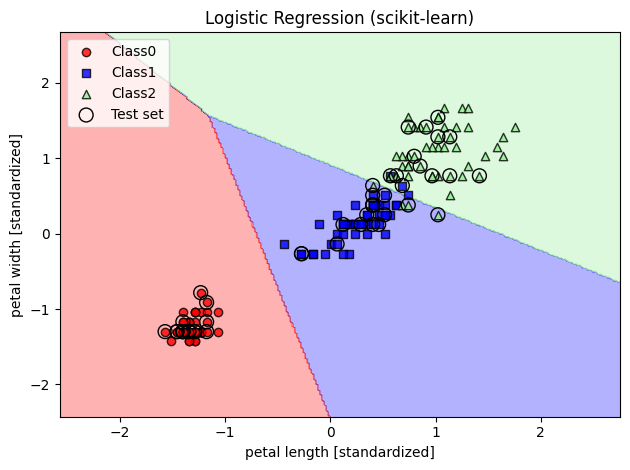

In [8]:
from sklearn.linear_model import LogisticRegression
# scikit-learnのロジスティック回帰を使用
# C：正規化パラメータの逆数、solver：最適化アルゴリズム。準ニュートン法の一つである'lbfgs'を使用、「一対他（One-vs-Rest）」戦略。
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')

lr.fit(X_train_std, y_train)
# scikit-learnのロジスティック回帰の決定境界をプロット
plot_decision_regions(x_combined, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.title('Logistic Regression (scikit-learn)')
plt.legend(loc='upper left')
plt.tight_layout()